credit to https://cainvas.ai-tech.systems/use-cases/tyre-prediction-app/

#Loading dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import cv2 as cv
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/tyre.zip"

--2022-02-16 13:28:53--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/tyre.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.66.48
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.66.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6245714 (6.0M) [application/x-zip-compressed]
Saving to: ‘tyre.zip’

tyre.zip            100%[===================>]   5.96M  3.10MB/s    in 1.9s    

2022-02-16 13:28:56 (3.10 MB/s) - ‘tyre.zip’ saved [6245714/6245714]



In [ ]:
!unzip -qo tyre.zip

#Preprocessing

In [ ]:
ls tire-dataset

flat/  full/  no-tire/


In [ ]:
train_dir= "./tire-dataset/"

In [ ]:
train_datagen= tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255, validation_split=0.2)

In [ ]:
train_generator= train_datagen.flow_from_directory(train_dir, target_size= (100,100), color_mode= 'grayscale', batch_size= 20, class_mode= 'categorical', subset= 'training')
val_generator= train_datagen.flow_from_directory(train_dir, target_size= (100,100), color_mode= 'grayscale', batch_size= 20, class_mode= 'categorical', subset= 'validation')

Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [ ]:
model= Sequential([
    layers.Conv2D(32, (3,3), activation= 'relu', input_shape= (100,100,1)),
    layers.MaxPooling2D(pool_size= (2,2), padding= 'same'),
    layers.Dropout(0.3),
    layers.Conv2D(16, (3,3), activation= 'relu'),
    layers.MaxPooling2D(pool_size= (2,2), padding= 'same'),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(25, activation= 'relu'),
#     layers.Dense(64, activation= 'relu'),
    layers.Dense(3, activation= 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9216)              0

#compiling and fitting model

In [ ]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
history= model.fit_generator(train_generator, epochs= 20, validation_data= val_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
36/36 [==============================] - 9s 234ms/step - loss: 0.6309 - accuracy: 0.6375 - val_loss: 0.5277 - val_accuracy: 0.6667
Epoch 2/20
36/36 [==============================] - 8s 229ms/step - loss: 0.3889 - accuracy: 0.8611 - val_loss: 0.4906 - val_accuracy: 0.6167
Epoch 3/20
36/36 [==============================] - 8s 227ms/step - loss: 0.2200 - accuracy: 0.9097 - val_loss: 0.5721 - val_accuracy: 0.7000
Epoch 4/20
36/36 [==============================] - 9s 254ms/step - loss: 0.1344 - accuracy: 0.9486 - val_loss: 0.4210 - val_accuracy: 0.8056
Epoch 5/20
36/36 [==============================] - 8s 226ms/step - loss: 0.1296 - accuracy: 0.9569 - val_loss: 0.3594 - val_accuracy: 0.7889
Epoch 6/20
36/36 [==============================] - 8s 223ms/step - loss: 0.0643 - accuracy: 0.9792 - val_loss: 0.2976 - val_accuracy: 0.8611
Epoch 7/20
36/36 [==============================] - 8s 225ms/step - loss: 0.0408 - accuracy: 0.9847 - val_loss: 0.2672 - val_accuracy: 0.9000
Epoch 

#plotting acuracy and loss

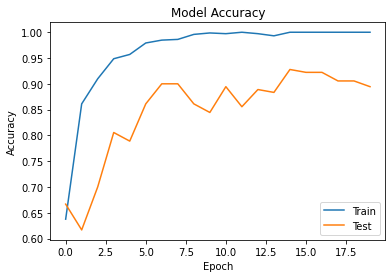

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc= "lower right");

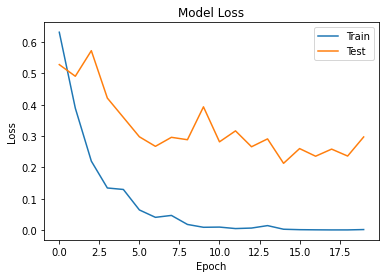

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'], loc= 'upper right');

#Predictions

In [ ]:
tyre = ["Flat Tyre","Full Tyre","No Tyre"]
def Single_Image_Prediction(file):
    #image = load_img(file, color_mode='rgb', target_size=(128, 128))
    image= file
    plt.imshow(image,cmap= 'gray')
    plt.show()
    print(image.shape)
#     cv.imshow('image',file)
#     cv.waitKey(0)
#     cv.destroyAllWimdows()
#     image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    img_arr = img_to_array(image)
#     img_arr = img_arr/255.
    np_image = np.expand_dims(img_arr, axis=0)
    return np_image

TypeError: ignored

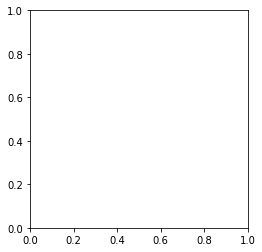

In [ ]:
image = Single_Image_Prediction(val_generator[0][0][11])
pred_value = model.predict(image)
print(pred_value)
index_value = np.argmax(pred_value,axis=1) #For categorical model
print(tyre[index_value[0]])

In [ ]:
image = Single_Image_Prediction(val_generator[0][0][12])
pred_value = model.predict(image)
print(pred_value)
index_value = np.argmax(pred_value,axis=1) #For categorical model
print(tyre[index_value[0]])

In [ ]:
image = Single_Image_Prediction(val_generator[0][0][0])
pred_value = model.predict(image)
print(pred_value)
index_value = np.argmax(pred_value,axis=1) #For categorical model
print(tyre[index_value[0]])

In [ ]:
model.save('tyre_v1.h5')